In [1]:
import lasio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
las = lasio.read(r'D:\Karim\Geostatics\A12a_A2-logdata\A12a-CPP-A02_1225in.LAS')

In [3]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [4]:
for item in las.sections['Well']:
    print (f'{item.descr}  ({item.mnemonic}) : \t\t {item.value}')

START INDEX  (390) : 		 390.0
STOP INDEX  (STOP) : 		 874.9284
STEP  (STEP) : 		 0.1524
NULL VALUE  (NULL) : 		 -999.25
COMPANY  (COMP) : 		 Chevron
WELL  (WELL) : 		 A12a-CPP-A2
FIELD  (FLD) : 		 A12
LOCATION  (LOC) : 		 North Sea Dutch Sector
PROVINCE  (PROV) : 		 
COUNTY  (CNTY) : 		 
STATE  (STAT) : 		 
COUNTRY  (CTRY) : 		 Netherlands
SERVICE COMPANY  (SRVC) : 		 Schlumberger D&M
LOG DATE  (DATE) : 		 17-Oct-07
UNIQUE WELL ID  (UWI) : 		 07HLB0009
API NUMBER  (API) : 		 


In [5]:
for count, par in enumerate(las.curves):
    print (f"curve :{par.mnemonic} \t Unit :{par.unit} \t The describtion :   {par.descr} ")
print (f'There is {count+1} curves in this log file')    

curve :DEPT 	 Unit :M 	 The describtion :   Bit Depth 2hz 
curve :GR_ARC 	 Unit :GAPI 	 The describtion :   ARC Gamma Ray 
curve :P16H_UNC 	 Unit :OHMM 	 The describtion :   ARC Non-BHCorr Phase-Shift Resistivity 16-in. at 2 MHz 
curve :P40H_UNC 	 Unit :OHMM 	 The describtion :   ARC Non-BHCorr Phase-Shift Resistivity 40-in. at 2 MHz 
curve :ROBB 	 Unit :G/C3 	 The describtion :   Bulk Density, Bottom 
curve :TNPH 	 Unit :PU 	 The describtion :   Thermal Neutron Porosity (Ratio Method) in Selected Lithology 
curve :VERD 	 Unit :IN 	 The describtion :   Vertical Hole Diameter 
curve :HORD 	 Unit :IN 	 The describtion :   Horizontal Hole Diameter 
There is 8 curves in this log file


In [6]:
df = las.df()
df.head()

,GR_ARC,P16H_UNC,P40H_UNC,ROBB,TNPH,VERD,HORD
DEPT,,,,,,,
390.14,57.50,5000.0,5000.00,2.29,42.61,12.32,12.32
390.30,59.15,5000.0,5000.00,2.29,43.97,12.32,12.32
390.45,55.76,5000.0,5000.00,2.31,46.06,12.40,12.43
390.60,50.98,5000.0,5000.00,2.31,42.49,12.40,12.43
390.75,45.81,5000.0,621.66,2.29,41.11,12.33,12.33


Mean of API : 	 98.68694462540716 
 p5% : 	 60.043 
 p95% : 	 128.99099999999999


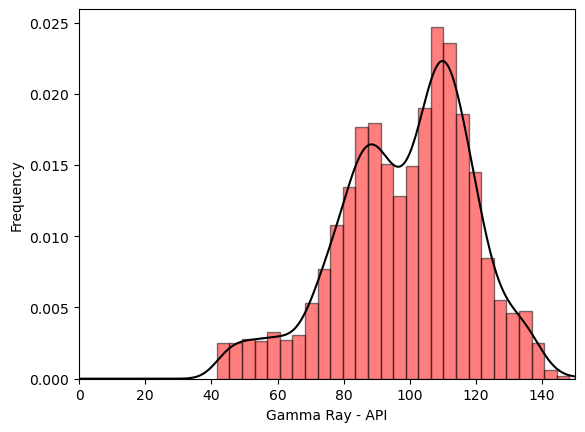

In [7]:
df['GR_ARC'].plot(kind='hist', bins = 30, alpha = 0.5, density = True, edgecolor= 'black', color = 'red')
df['GR_ARC'].plot(kind = 'kde', color = 'black')
plt.xlabel('Gamma Ray - API')
plt.ylabel('Frequency')
plt.xlim(0,150)


average = df['GR_ARC'].mean()
p5 = df['GR_ARC'].quantile(0.05)
p95 = df['GR_ARC'].quantile(0.95)
print (f'Mean of API : \t {average} \n p5% : \t {p5} \n p95% : \t {p95}')

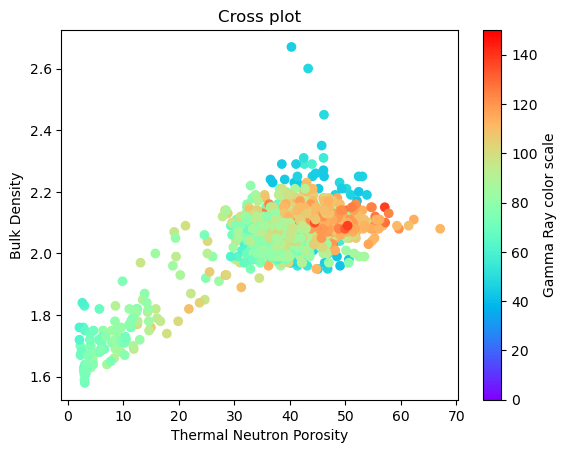

In [8]:
plt.scatter(x = 'TNPH' , y = 'ROBB', data = df , c = 'GR_ARC' , vmin = 0, vmax=150, cmap = 'rainbow')
plt.colorbar(label='Gamma Ray color scale')
plt.title("Cross plot")
plt.xlabel("Thermal Neutron Porosity")
plt.ylabel("Bulk Density")
plt.show()


In [9]:
df.reset_index(inplace = True)

In [10]:
df.rename(columns={'DEPT':'Depth','GR_ARC':'GR', 'ROBB':'Density', 'TNPH':'Neutron'}, inplace = True)
df.head()


,Depth,GR,P16H_UNC,P40H_UNC,Density,Neutron,VERD,HORD
0,390.14,57.50,5000.0,5000.00,2.29,42.61,12.32,12.32
1,390.30,59.15,5000.0,5000.00,2.29,43.97,12.32,12.32
2,390.45,55.76,5000.0,5000.00,2.31,46.06,12.40,12.43
3,390.60,50.98,5000.0,5000.00,2.31,42.49,12.40,12.43
4,390.75,45.81,5000.0,621.66,2.29,41.11,12.33,12.33


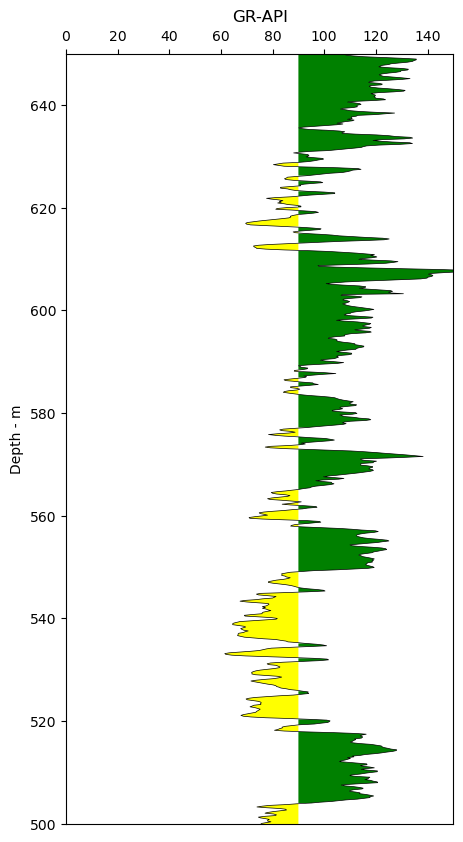

In [11]:
plt.figure(figsize=(5,10))
plt.plot('GR', 'Depth', data = df, color = 'black', lw = 0.5)
plt.fill_betweenx(df['Depth'] ,90, df['GR'] , where= df['GR']<=90  ,facecolor = 'yellow')
plt.fill_betweenx(df['Depth'] ,90, df['GR'] , where= df['GR']>=90  ,facecolor = 'green')
plt.xlim(0,150)
plt.ylim(500,650)
plt.ylabel('Depth - m')
plt.title('GR-API')
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

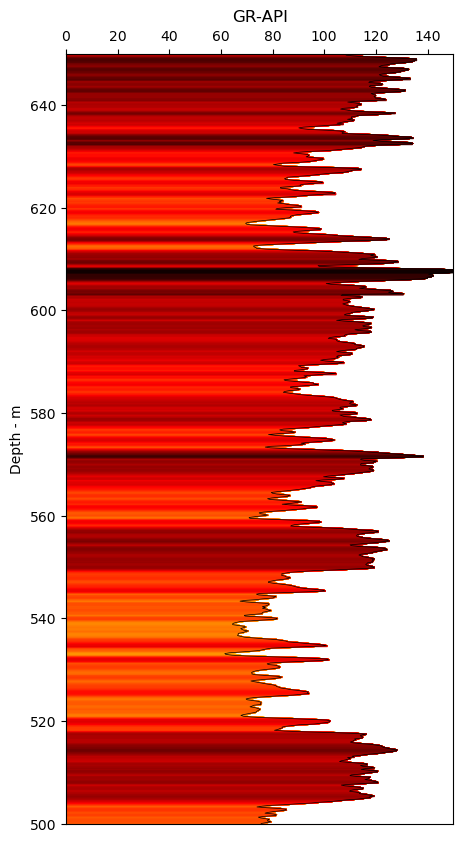

In [12]:
plt.figure(figsize=(5,10))
plt.plot('GR', 'Depth', data = df, color = 'black', lw = 0.5)
plt.xlim(0,150)
plt.ylim(500,650)
plt.ylabel('Depth - m')
plt.title('GR-API')
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)
min_value = 0
max_value = 150
span = abs(max_value-min_value)
cmap=plt.get_cmap('hot_r')
color_index = np.arange(min_value , max_value , span/100)
for index in sorted(color_index):
    index_value = (index-min_value)/span
    color = cmap(index_value)
    
    plt.fill_betweenx(df['Depth'] ,min_value, df['GR'] , where= df['GR']>=index  ,color = color )
    


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]), [])

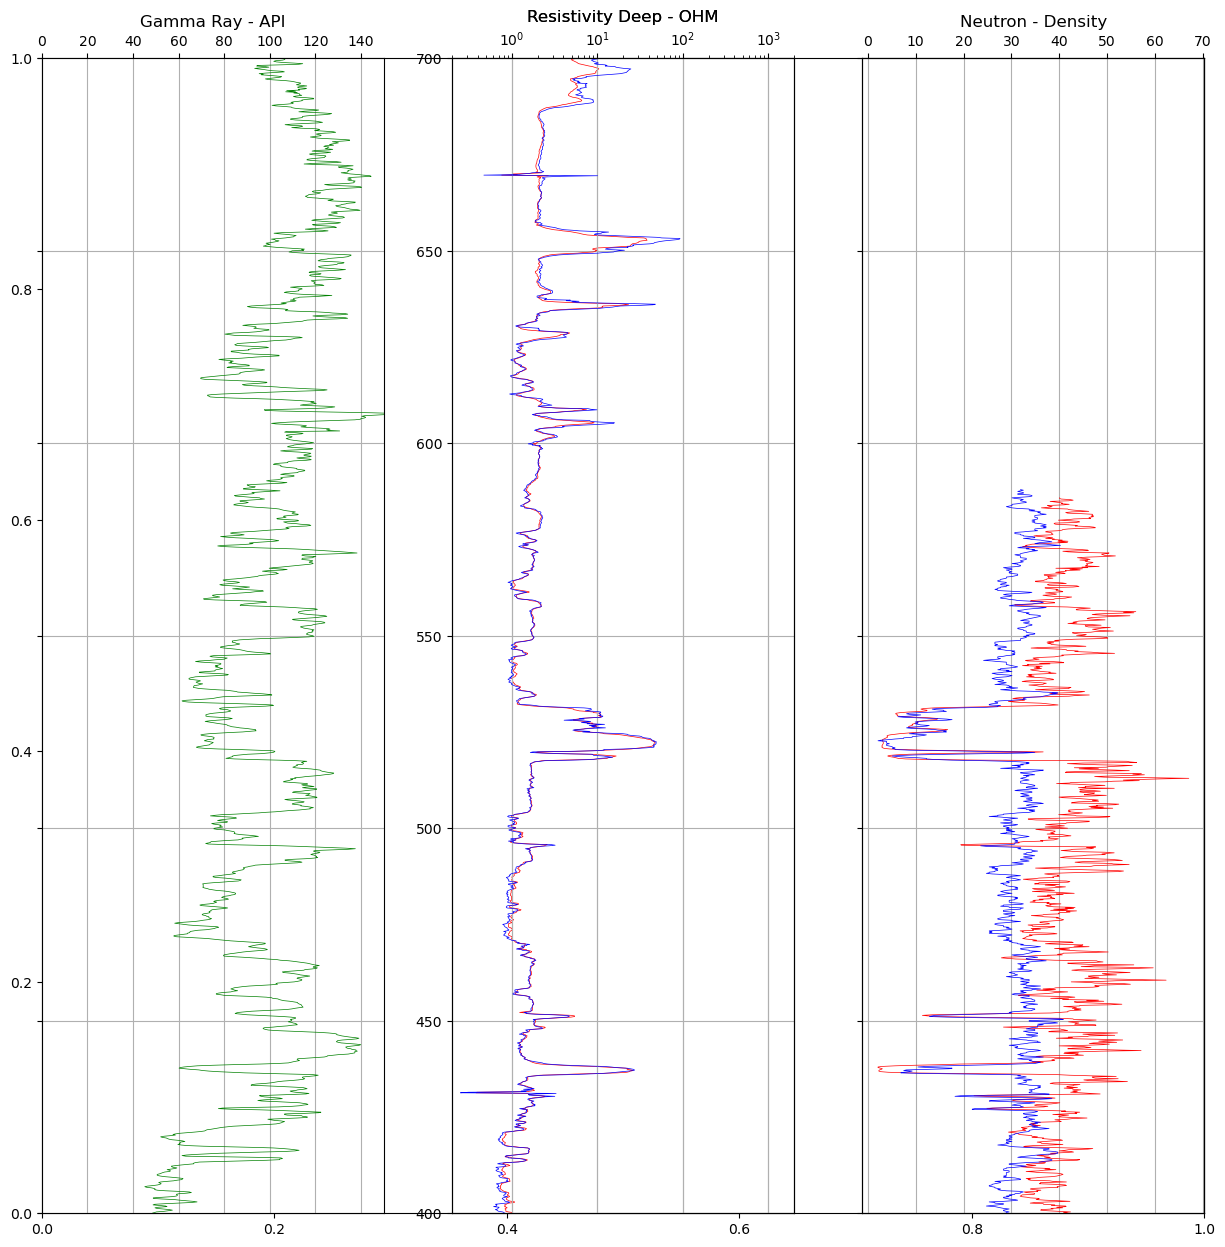

In [15]:
# Create the figure
fig, _ = plt.subplots(figsize=(15, 15))

# Define the subplots
log1 = plt.subplot2grid((1,3), (0,0)) # subplot 1
log2 = plt.subplot2grid((1,3), (0,1)) # subplot 2
log3 = plt.subplot2grid((1,3), (0,2)) # subplot 3
log4 = log3.twiny() # subplot 4
log5 = log2.twiny() # subplot 5

# Hide y-tick labels for some subplots
for log in [log1, log3]:
    plt.setp(log.get_yticklabels(), visible=False)

# Gamma Ray log
log1.plot('GR', 'Depth', data=df, color='green' , lw = 0.5)
log1.set_xlim(0, 150)
log1.set_ylim(400, 700)
log1.set_title('Gamma Ray - API')
log1.grid()
log1.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

# Resistivity semi log
log2.plot('P16H_UNC', 'Depth', data=df, color='red', lw = 0.5)
log2.set_ylim(400, 700)
log2.set_xlim(0.2, 2000)
log2.semilogx()
log2.grid()
log2.set_title('Resistivity Deep - OHM')
log2.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)


# Resistivity semi log
log5.plot('P40H_UNC', 'Depth', data=df, color='blue', lw = 0.5)
log5.set_ylim(400, 700)
log5.set_xlim(0.2, 2000)
log5.semilogx()
log5.grid()
log5.set_title('Resistivity Deep - OHM')
log5.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)


# Neutron porosity log 
log3.plot('Neutron', 'Depth', data=df, color='red' , lw = 0.5)
log3.set_title('Neutron - Density')
log3.grid()
log3.set_ylim(400, 700)
log3.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

# Density porosity log 
log4.plot('Density', 'Depth', data=df, color='blue', lw = 0.5)
log4.set_ylim(400, 700)
log4.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False, labeltop=False)


# Adjust x-ticks rotation for better readability
plt.xticks(rotation=45)

